Understand how contrastive embeddings use the dimensions of the embedding space.

In [1]:
cd ../..

/userdata/jgauthier/projects/ideal-word-representations


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch

In [3]:
from IsoScore.IsoScore import IsoScore

In [10]:
embedding_paths = {
    "phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_8/phoneme/embeddings.npy",
    "phoneme3": "outputs/model_embeddings/timit/w2v2_6/rnn_3/phoneme/embeddings.npy",
    "next_phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_8/next_phoneme/embeddings.npy",
    "biphone_pred": "outputs/model_embeddings/timit/w2v2_6/rnn_8/biphone_pred/embeddings.npy",
    "biphone_recon": "outputs/model_embeddings/timit/w2v2_6/rnn_8/biphone_recon/embeddings.npy",
    "syllable": "outputs/model_embeddings/timit/w2v2_6/rnn_8/syllable/embeddings.npy",
    "word": "outputs/model_embeddings/timit/w2v2_6/rnn_8/word/embeddings.npy",

    "10_phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_3-weightdecay0.01/phoneme_10frames/embeddings.npy",
    "10_next_phoneme": "outputs/model_embeddings/timit/w2v2_6/rnn_8-weightdecay0.01/next_phoneme_10frames/embeddings.npy",
    "10_biphone_pred": "outputs/model_embeddings/timit/w2v2_6/rnn_8-weightdecay0.01/biphone_pred_10frames/embeddings.npy",
    "10_biphone_recon": "outputs/model_embeddings/timit/w2v2_6/rnn_8-weightdecay0.01/biphone_recon_10frames/embeddings.npy",
    "10_syllable": "outputs/model_embeddings/timit/w2v2_6/rnn_8-weightdecay0.01/syllable_10frames/embeddings.npy",
    "10_word": "outputs/model_embeddings/timit/w2v2_6/rnn_8-weightdecay0.01/word_10frames/embeddings.npy",
    "10_word_broad": "outputs/model_embeddings/timit/w2v2_6/rnn_8-weightdecay0.01/word_broad_10frames/embeddings.npy",

    "random_rnn": "outputs/model_embeddings/timit/w2v2_6/randomrnn_8/random/embeddings.npy",
    "random_ff": "outputs/model_embeddings/timit/w2v2_6/randomff_8/random/embeddings.npy",
}

In [12]:
embeddings = {}
for key, path in embedding_paths.items():
    try:
        embeddings[key] = np.load(path)
    except FileNotFoundError:
        print(f"Embedding {key} not found")

In [6]:
# from sklearn.decomposition import PCA
# embeddings_decomp = {}
# for key, emb in embeddings.items():
#     pca = PCA(n_components=1)
#     pca.fit(emb)
    
#     # Remove first K principal components from embedding
#     emb = emb - emb @ pca.components_.T @ pca.components_
#     embeddings_decomp[key] = emb

# # # DEV
# # embeddings = embeddings_decomp

## Correlation measure

In [13]:
corrs = []
for key, embedding in embeddings.items():
    corrs_i = np.corrcoef(embedding.T)
    corrs_i = np.abs(corrs_i[np.triu_indices(corrs_i.shape[0], k=1)])

    for corrs_ij in corrs_i:
        corrs.append((key, corrs_ij))

In [14]:
corrs_df = pd.DataFrame(corrs, columns=["embedding", "correlation"])
corrs_df["num_frames"] = corrs_df["embedding"].apply(lambda x: int(x.split("_")[0]) if x.split("_")[0].isdigit() else 1)
corrs_df["embedding"] = corrs_df["embedding"].apply(lambda x: "_".join(x.split("_")[1:]) if x.split("_")[0].isdigit() else x)
corrs_df

,embedding,correlation,num_frames
0,phoneme,0.993405,1
1,phoneme,0.996118,1
2,phoneme,0.998187,1
3,phoneme,0.999140,1
4,phoneme,0.992037,1
...,...,...,...
393,random_ff,0.185072,1
394,random_ff,0.161799,1
395,random_ff,0.024003,1
396,random_ff,0.288319,1


/tmp/ipykernel_1044192/3751898300.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'phoneme'),
 Text(1, 0, 'phoneme3'),
 Text(2, 0, 'next_phoneme'),
 Text(3, 0, 'biphone_pred'),
 Text(4, 0, 'biphone_recon'),
 Text(5, 0, 'syllable'),
 Text(6, 0, 'word'),
 Text(7, 0, 'word_broad'),
 Text(8, 0, 'random_rnn'),
 Text(9, 0, 'random_ff')]

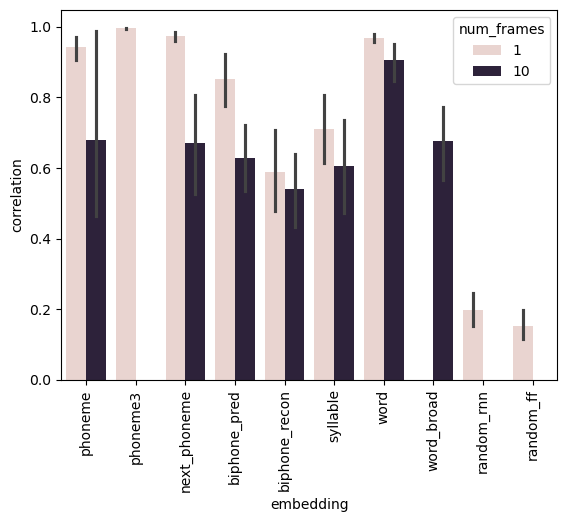

In [15]:
ax = sns.barplot(data=corrs_df, x="embedding", y="correlation", hue="num_frames")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## IsoScore

In [16]:
isoscores = pd.Series({key: IsoScore(embeddings[key]).item() for key in embeddings}).rename("isoscore").rename_axis("embedding").reset_index()
isoscores["num_frames"] = isoscores["embedding"].apply(lambda x: int(x.split("_")[0]) if x.split("_")[0].isdigit() else 1)
isoscores["embedding"] = isoscores["embedding"].apply(lambda x: x.split("_")[-1] if x.split("_")[0].isdigit() else x)
isoscores

,embedding,isoscore,num_frames
0,phoneme,0.000963,1
1,phoneme3,0.001282,1
2,next_phoneme,0.001456,1
3,biphone_pred,0.005771,1
4,biphone_recon,0.082468,1
5,syllable,0.030212,1
6,word,0.002826,1
7,phoneme,0.099266,10
8,phoneme,0.003562,10
9,pred,0.106908,10


<Axes: xlabel='embedding', ylabel='isoscore'>

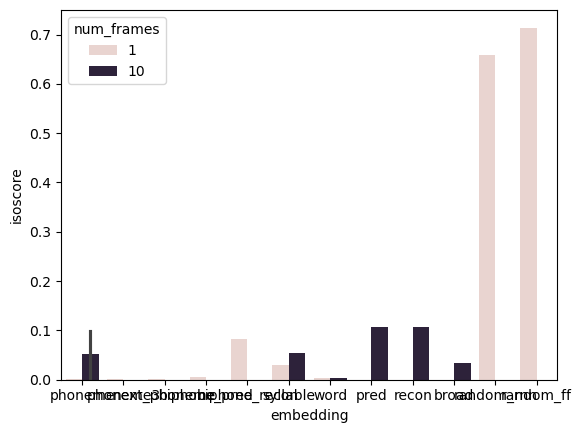

In [17]:
sns.barplot(data=isoscores, x="embedding", y="isoscore", hue="num_frames")